# Fourier Transforms Walkthrough

Here I clone Nikolay Manchev's github just to snage the wav file he made with a recording of a chord from his piano.

In [2]:
!git clone "https://github.com/nmanchev/coursera.git"

fatal: destination path 'coursera' already exists and is not an empty directory.


In [3]:
!ls coursera/coursera_ml/fourier_transform

chord_fft.py  disc_ft.py  ft.dml  output.wav  plot_chord_wave.py  README.md


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

Use scipy to read in the wavefile

In [5]:
fs, snd = wavfile.read("coursera/coursera_ml/fourier_transform/output.wav")

In [6]:
snd = snd / (2.**15)
s1 = snd[:,0]

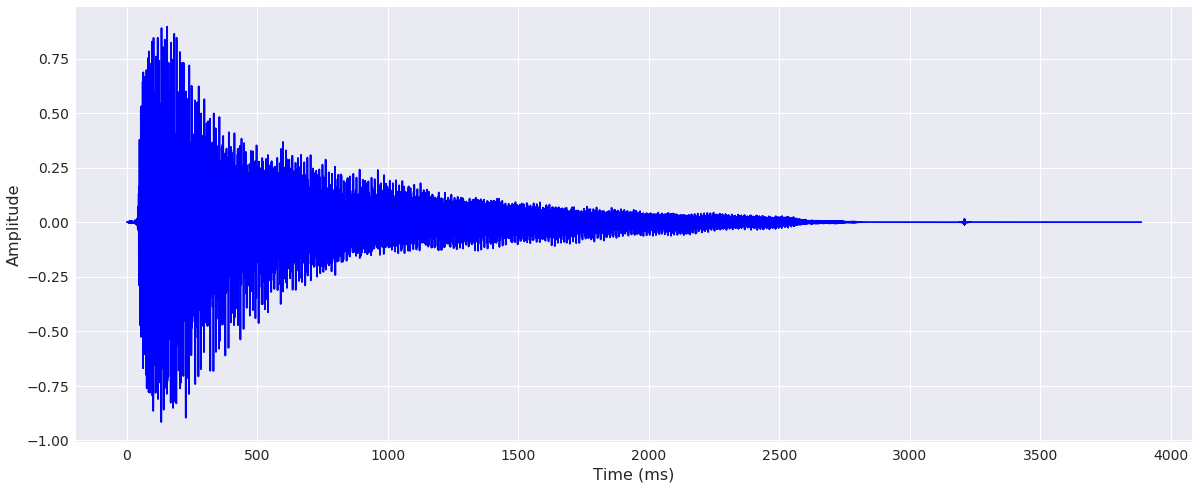

In [7]:
plt.figure(figsize = (20, 8))
plt.style.use("seaborn")

time = np.arange(0, s1.shape[0], 1)
time = (time / fs) * 1000

plt.plot(time, s1, color = 'b')

plt.ylabel('Amplitude', fontsize = 16)
plt.xlabel('Time (ms)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

Use Numpy's Fast Fourier Transform.  Set the threshold high enough to only get the 3 strongest signals.

In [8]:
import math
from numpy.fft import fft

[ 329.  330.  415.  555.]


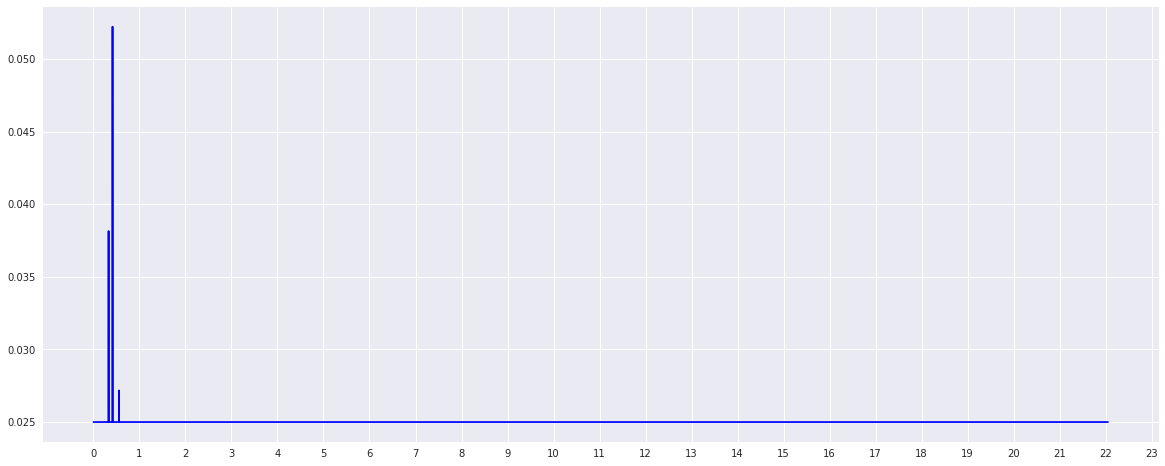

In [9]:
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.style.use("seaborn")

threshold = 0.025
y = snd[:, 0]

plt.figure(figsize = (20, 8))

n = len(y)
p = fft(y)

mag = np.sqrt(p.real**2 + p.imag ** 2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

freq = np.arange(0, len(mag), 1.0) * (fs / n)

if threshold != 0:
    print(np.unique(np.rint(freq[np.in1d(mag, mag[mag > threshold])])))
    mag[mag < threshold] = threshold

plt.plot(freq/1000, mag, color = 'b')
plt.xticks(np.arange(min(freq/1000), max(freq/1000) + 1, 1.0))

plt.show()

Create a function to create signals on demand.

In [46]:
def gen_wave (freq, amp, T, shift, sr):

    time = np.arange(0,T,1/sr)
    
    X = amp*np.sin(2*np.pi*freq*time+shift)
    
    return time,X

In [47]:
time, amplitude = gen_wave(3, 4, 1, 1.5, 1000)

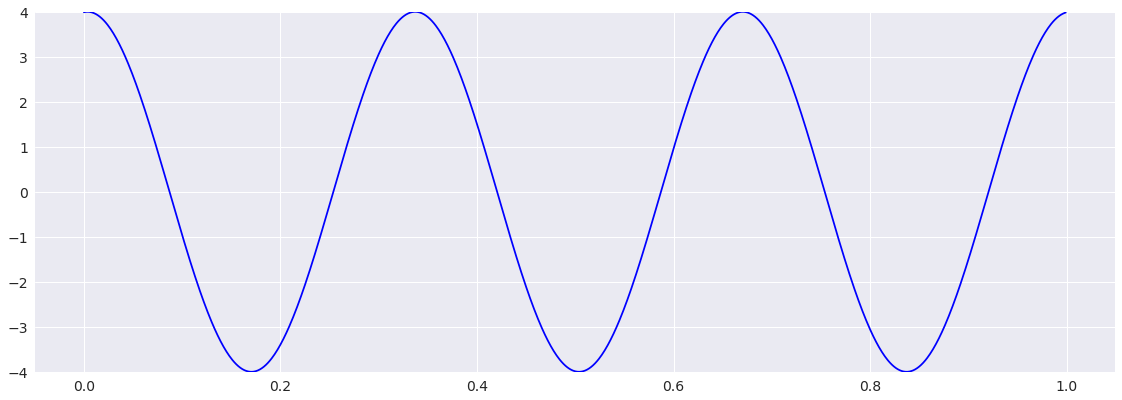

In [48]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim([-4, 4])

ax.plot(time, amplitude, c = 'b')

plt.grid(True, which = 'both')

plt.show()

In [51]:
time, amplitude1 = gen_wave(1, 1, 10, 1, 1000)
time, amplitude2 = gen_wave(2, 2, 10, 1, 1000)
time, amplitude3 = gen_wave(3, 2, 10, 0, 1000)

amplitude = amplitude1 + amplitude2 + amplitude3

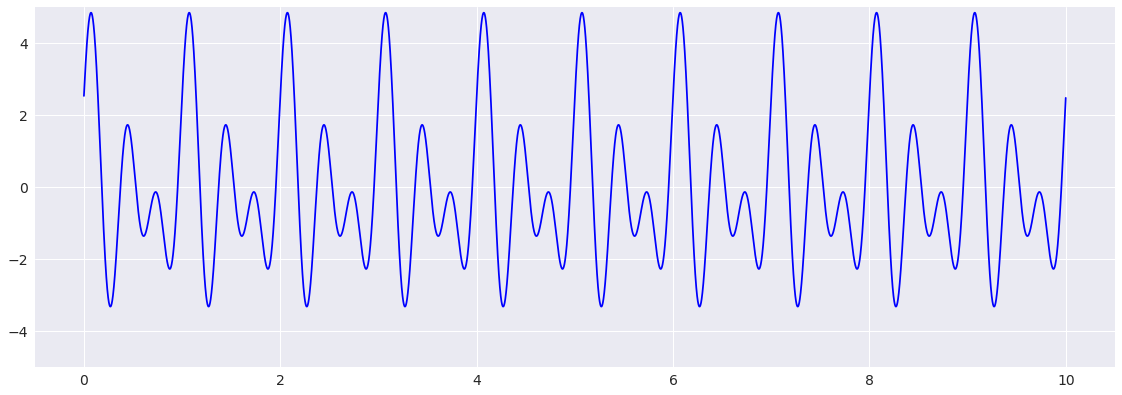

In [52]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim([-5, 5])

ax.plot(time, amplitude, c = 'b')

plt.grid(True, which = 'both')

plt.show()

Playing with the sampling rate

In [32]:
time, amplitude = gen_wave(5, 2, 1, 0, 1000)

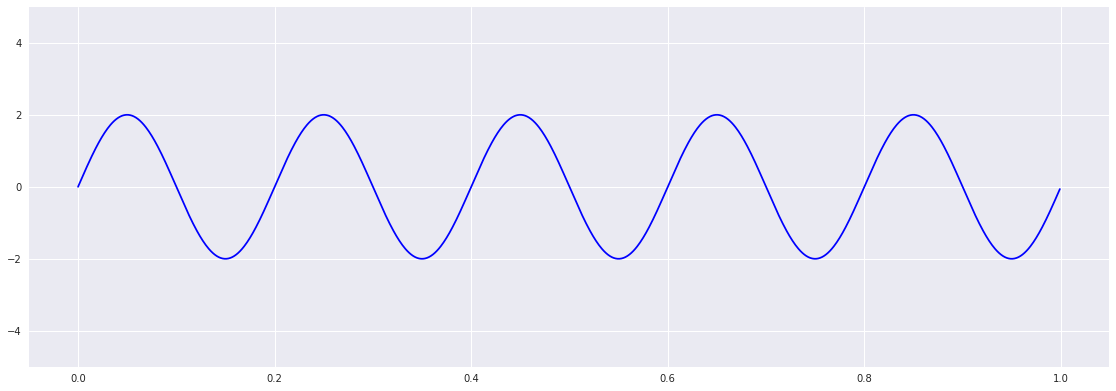

In [33]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim([-5, 5])

ax.plot(time, amplitude, c = 'b')

plt.grid(True, which = 'both')

plt.show()

In [30]:
time, amplitude = gen_wave(5, 2, 1, 0, 30)

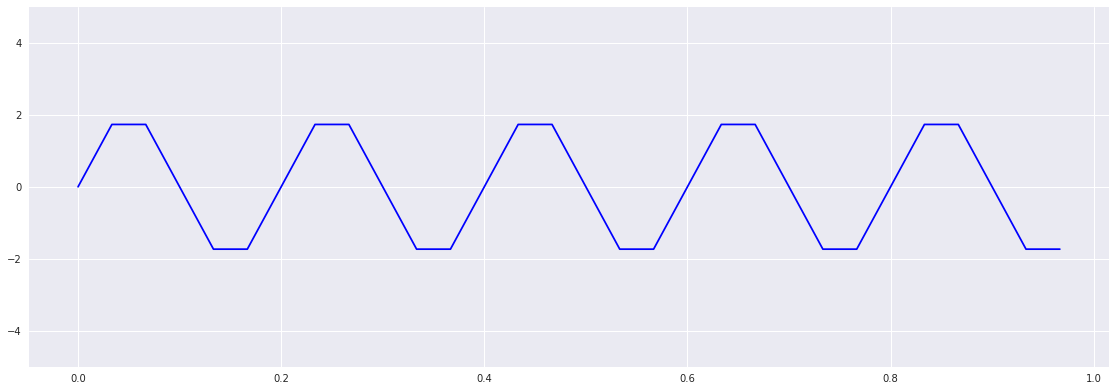

In [31]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylim([-5, 5])

ax.plot(time, amplitude, c = 'b')

plt.grid(True, which = 'both')

plt.show()

Discrete Fourier Transforms handle sampled signals.  Any sampled signal of length N can be represented uniquely by a finite series of sinusoids

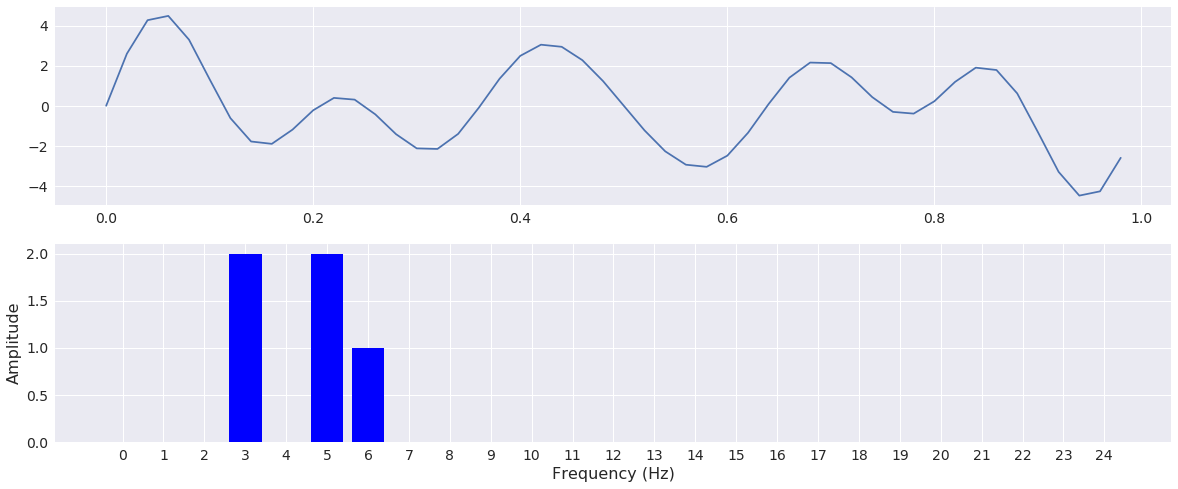

In [44]:
import numpy as np

import matplotlib.pyplot as plt

import math

from numpy.fft import fft


def gen_wave (freq, amp, T, sr):

    time = np.arange(0,T,1/sr)
    
    X = amp*np.sin(2*np.pi*freq*time)
    
    return time,X


plt.style.use("seaborn")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14


f, axarr = plt.subplots(2, figsize=(20, 8))

sr=50 #in Hz

x,y   = gen_wave(3,2,1,sr)
_,y2   = gen_wave(5,2,1,sr)
_, y3 = gen_wave(6, 1, 1, sr)

y = y + y2 + y3

axarr[0].plot(x, y)


n = len(y) 
p = fft(y) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)] # spectorgram is symetrical so only need the first half.  Number of bins is half the sampling rate

x = np.arange(0, len(mag), 1.0) * (sr / n)

axarr[1].bar(x, mag, color='b')
axarr[1].xaxis.set_ticks(np.arange(min(x), max(x)+1, 1.0))
plt.ylabel('Amplitude', fontsize = 16)
plt.xlabel('Frequency (Hz)', fontsize = 16)
plt.show()